In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
data = pd.read_csv("/content/gdrive/MyDrive/NYC-sale-project/dataCleaned.csv")

Mounted at /content/gdrive/


In [3]:
df = data.copy()

In [4]:
df

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,40.7262,-73.9796
1,1,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,40.7262,-73.9796
2,1,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,40.7262,-73.9796
3,1,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,40.7262,-73.9796
4,1,08 RENTALS - ELEVATOR APARTMENTS,2,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,40.7262,-73.9796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36014,5,02 TWO FAMILY DWELLINGS,1,B2,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,40.5352,-74.2116
36015,5,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,40.5352,-74.2116
36016,5,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,40.5352,-74.2116
36017,5,02 TWO FAMILY DWELLINGS,1,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,40.5352,-74.2116


<ipython-input-5-753ca5bff919>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

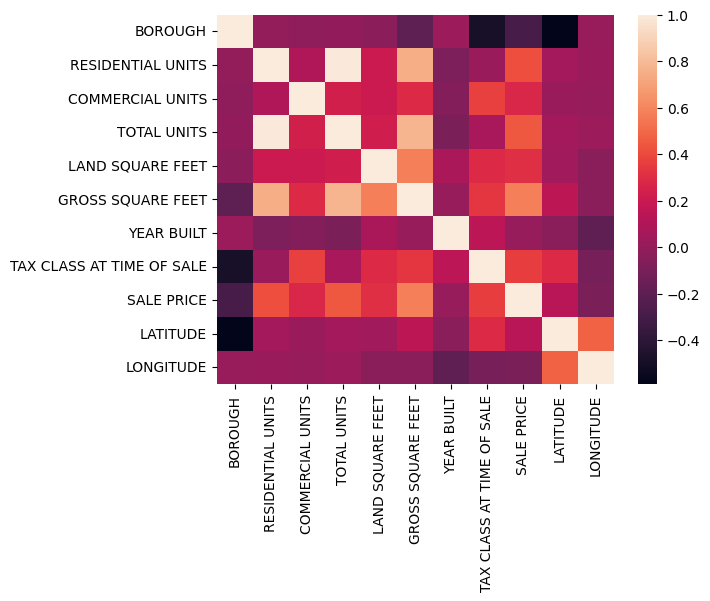

In [5]:
corr = df.corr()
sns.heatmap(corr)

In [6]:
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE                   1.000000
GROSS SQUARE FEET            0.572811
TOTAL UNITS                  0.441507
RESIDENTIAL UNITS            0.413784
TAX CLASS AT TIME OF SALE    0.357493
LAND SQUARE FEET             0.310296
COMMERCIAL UNITS             0.273394
LATITUDE                     0.132707
YEAR BUILT                   0.009898
LONGITUDE                   -0.087793
BOROUGH                     -0.287033
Name: SALE PRICE, dtype: float64

In [7]:
df['TAX CLASS AT PRESENT'].unique()

array(['2A', '2B', '2', '2C', '4', '1', '1C', ' ', '1B', '1A'],
      dtype=object)

In [8]:
df2 = df.copy()

In [9]:
df2['TAX CLASS AT PRESENT'].replace('1A','1',inplace=True)
df2['TAX CLASS AT PRESENT'].replace('1B','1',inplace=True)
df2['TAX CLASS AT PRESENT'].replace('1C','1',inplace=True)
df2['TAX CLASS AT PRESENT'].replace('2A','2',inplace=True)
df2['TAX CLASS AT PRESENT'].replace('2B','2',inplace=True)
df2['TAX CLASS AT PRESENT'].replace('2C','2',inplace=True)
df2['TAX CLASS AT PRESENT'].replace(' ',0,inplace=True)

In [10]:
df2['TAX CLASS AT PRESENT'].unique()

array(['2', '4', '1', 0], dtype=object)

In [11]:
df2['TAX CLASS AT PRESENT'] = df2['TAX CLASS AT PRESENT'].astype('int64')

In [12]:
count = 0
for index,rows in df2.iterrows():
  if rows['TAX CLASS AT PRESENT'] == rows['TAX CLASS AT TIME OF SALE']:
    count += 1
count

36009

In [13]:
48386/48400

0.9997107438016529

In [14]:
df2['TAX CLASS AT TIME OF SALE'].unique()

array([2, 4, 1])

In [15]:
del df['TAX CLASS AT PRESENT']

In [16]:
count = 0
for index,rows in df2.iterrows():
  if rows['BUILDING CLASS AT PRESENT'] == rows['BUILDING CLASS AT TIME OF SALE']:
    count += 1
count

35924

In [17]:
48291/48400

0.9977479338842975

In [18]:
del df['BUILDING CLASS AT PRESENT']

In [19]:
df2 = df.groupby(['BOROUGH'])['SALE PRICE'].mean()
df2 = df2.reset_index()
fig = px.bar(df2,x='BOROUGH',y='SALE PRICE')
fig.show()

In [20]:
df2 = df.groupby(['LATITUDE','LONGITUDE'])['SALE PRICE'].mean()
df2 = df2.reset_index()
df2

,LATITUDE,LONGITUDE,SALE PRICE
0,40.5085,-74.2445,7.268362e+05
1,40.5352,-74.2116,6.725519e+05
2,40.5457,-74.1792,5.416511e+05
3,40.5518,-74.1526,5.361052e+05
4,40.5682,-74.1184,5.266247e+05
...,...,...,...
175,40.8798,-73.9067,1.672094e+06
176,40.8904,-73.8503,5.241585e+05
177,40.9000,-73.8622,8.670331e+05
178,40.9011,-73.9053,1.732841e+06


In [21]:
df2 = df.groupby(['BOROUGH','LATITUDE','LONGITUDE'])['SALE PRICE'].mean()
df2 = df2.reset_index()
df2

,BOROUGH,LATITUDE,LONGITUDE,SALE PRICE
0,1,40.7056,-74.0083,1.654783e+06
1,1,40.7085,-74.0135,3.189902e+06
2,1,40.7101,-74.0013,1.603955e+06
3,1,40.7105,-74.0163,1.177978e+06
4,1,40.7139,-74.0070,4.895852e+06
...,...,...,...,...
176,5,40.6102,-74.0878,5.889447e+05
177,5,40.6301,-74.1607,3.728734e+05
178,5,40.6306,-74.1379,4.504543e+05
179,5,40.6316,-74.0927,5.979503e+05


In [22]:
fig =px.scatter(df2, x='LATITUDE',y='LONGITUDE',color ='BOROUGH',symbol='BOROUGH')
fig.update_traces(marker_size=10)
fig.show()

In [23]:
fig =px.scatter_3d(df2, x='LATITUDE',y='LONGITUDE',z='SALE PRICE',color ='BOROUGH',symbol='BOROUGH')
fig.update_traces(marker_size=10)
fig.show()

In [24]:
del df['BOROUGH']

In [25]:
df2 = df.groupby(['LATITUDE','LONGITUDE'])['SALE PRICE'].count()
df2=df2.reset_index()

In [26]:
lat_lon_weight = []
for index,rows in df2.iterrows():
  row = []
  row = [rows['LATITUDE'],rows['LONGITUDE'],rows['SALE PRICE']]
  lat_lon_weight.append(row)


import folium

from folium.plugins import HeatMap


map_obj = folium.Map(location = [ 40.730610,-73.935242], zoom_start = 11)

HeatMap(lat_lon_weight).add_to(map_obj)

map_obj

In [27]:
df2 = df.groupby(['LATITUDE','LONGITUDE'])['SALE PRICE'].mean()
df2=df2.reset_index()

In [28]:
lat_lon_weight = []
for index,rows in df2.iterrows():
  row = []
  row = [rows['LATITUDE'],rows['LONGITUDE'],rows['SALE PRICE']]
  lat_lon_weight.append(row)


import folium

from folium.plugins import HeatMap


map_obj = folium.Map(location = [ 40.730610,-73.935242], zoom_start = 11)

HeatMap(lat_lon_weight).add_to(map_obj)

map_obj

In [29]:
df2 = df.groupby(['BUILDING CLASS CATEGORY','BUILDING CLASS AT TIME OF SALE'])['SALE PRICE'].mean()
df2 = df2.reset_index()

In [30]:
df2

,BUILDING CLASS CATEGORY,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,01 ONE FAMILY DWELLINGS,A0,6.746377e+05
1,01 ONE FAMILY DWELLINGS,A1,6.623745e+05
2,01 ONE FAMILY DWELLINGS,A2,5.819890e+05
3,01 ONE FAMILY DWELLINGS,A3,1.543164e+06
4,01 ONE FAMILY DWELLINGS,A4,5.182704e+06
...,...,...,...
125,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,RA,2.640000e+06
126,43 CONDO OFFICE BUILDINGS,RB,3.400437e+06
127,44 CONDO PARKING,RG,1.066568e+07
128,45 CONDO HOTELS,RH,3.172987e+06


In [31]:
len(data['BUILDING CLASS AT TIME OF SALE'].unique())

130

In [32]:
len(data['BUILDING CLASS CATEGORY'].unique())

39

In [33]:
import plotly.subplots as sp
import plotly.graph_objs as go

# set the size and layout of the graphs
subplot_rows = 15 # set the number of rows in the grid
subplot_cols = 3 # set the number of columns in the grid
fig_width = 1400 # set the width of the graph
fig_height = 2000 # set the height of the graph
margin = dict(l=50, r=50, b=50, t=50, pad=4) # set the margins of the graph

# create a grid of subplots
fig = sp.make_subplots(
    rows=subplot_rows,
    cols=subplot_cols,
    shared_xaxes=False,
    shared_yaxes=False,
    subplot_titles=df2['BUILDING CLASS CATEGORY'].unique()
)

for i,index_value in enumerate(df2["BUILDING CLASS CATEGORY"].unique()):
    # filter the dataframe by the index value
    df_subset = df2[df2["BUILDING CLASS CATEGORY"]==index_value]

    # create the bar chart
    fig.add_trace(
        go.Bar(x=df_subset['BUILDING CLASS AT TIME OF SALE'], y=df_subset['SALE PRICE']),
        row=i//subplot_cols + 1,
        col=i%subplot_cols + 1
    )


# set the title of the chart to be the index value    
fig.update_layout(
    width=fig_width,
    height=fig_height,
    margin=margin,
    showlegend=False
)

    
# show the chart
fig.show()

In [34]:
df2 = df.groupby (['BUILDING CLASS CATEGORY'])['SALE PRICE'].mean()
df2 = df2.reset_index()
fig = px.bar(df2,x='BUILDING CLASS CATEGORY',y='SALE PRICE')
fig.show()

In [35]:
del df['BUILDING CLASS CATEGORY']

In [36]:
df.to_csv(r'dataFinal.csv',index=False)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36019 entries, 0 to 36018
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RESIDENTIAL UNITS               36019 non-null  int64  
 1   COMMERCIAL UNITS                36019 non-null  int64  
 2   TOTAL UNITS                     36019 non-null  int64  
 3   LAND SQUARE FEET                36019 non-null  float64
 4   GROSS SQUARE FEET               36019 non-null  float64
 5   YEAR BUILT                      36019 non-null  int64  
 6   TAX CLASS AT TIME OF SALE       36019 non-null  int64  
 7   BUILDING CLASS AT TIME OF SALE  36019 non-null  object 
 8   SALE PRICE                      36019 non-null  float64
 9   LATITUDE                        36019 non-null  float64
 10  LONGITUDE                       36019 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.0+ MB
